In [155]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [156]:
pd.set_option('display.max_columns', None)

In [157]:
df= pd.read_parquet('../data/processed/us_accidents_polars.parquet')
df

,Severity,Start_Time,State,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,distance_to_airport(mi)
0,3,2016-02-08 05:46:00,OH,36.9,91.0,29.68,10.0,Calm,8.0,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2.752093
1,2,2016-02-08 06:07:59,OH,37.9,100.0,29.65,10.0,Calm,8.1,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day,5.800391
2,2,2016-02-08 06:49:27,OH,36.0,100.0,29.67,10.0,SW,3.5,0.00,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day,9.577639
3,3,2016-02-08 07:23:34,OH,35.1,96.0,29.64,9.0,SW,4.6,0.00,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day,10.702810
4,2,2016-02-08 07:39:07,OH,36.0,89.0,29.65,6.0,SW,3.5,0.00,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day,3.308864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7705754,2,2019-08-23 18:03:25,CA,86.0,40.0,28.92,10.0,W,13.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,5.130412
7705755,2,2019-08-23 19:11:30,CA,70.0,73.0,29.39,10.0,SW,6.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,3.397634
7705756,2,2019-08-23 19:00:21,CA,73.0,64.0,29.74,10.0,SSW,10.0,0.00,Partly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day,6.984253
7705757,2,2019-08-23 19:00:21,CA,71.0,81.0,29.62,10.0,SW,8.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,3.184000


In [158]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7705759 entries, 0 to 7705758
Data columns (total 29 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Severity                 int64  
 1   Start_Time               object 
 2   State                    object 
 3   Temperature(F)           float64
 4   Humidity(%)              float64
 5   Pressure(in)             float64
 6   Visibility(mi)           float64
 7   Wind_Direction           object 
 8   Wind_Speed(mph)          float64
 9   Precipitation(in)        float64
 10  Weather_Condition        object 
 11  Amenity                  bool   
 12  Bump                     bool   
 13  Crossing                 bool   
 14  Give_Way                 bool   
 15  Junction                 bool   
 16  No_Exit                  bool   
 17  Railway                  bool   
 18  Roundabout               bool   
 19  Station                  bool   
 20  Stop                     bool   
 21  Traffic_

In [159]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='mixed')

df['start_month'] = df['Start_Time'].dt.month
df['start_year'] = df['Start_Time'].dt.year
df['start_hour'] = df['Start_Time'].dt.hour
df['start_day'] = df['Start_Time'].dt.day

In [160]:
df.drop(columns=['Start_Time'], inplace=True, axis=1, errors='ignore')

In [161]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"Column: {col}, Unique Values: {df[col].nunique()}")

Column: State, Unique Values: 49
Column: Wind_Direction, Unique Values: 24
Column: Weather_Condition, Unique Values: 144
Column: Sunrise_Sunset, Unique Values: 2
Column: Civil_Twilight, Unique Values: 2
Column: Nautical_Twilight, Unique Values: 2
Column: Astronomical_Twilight, Unique Values: 2


In [162]:
df['Wind_Direction'].unique()

array(['Calm', 'SW', 'SSW', 'WSW', 'WNW', 'NW', 'West', 'NNW', 'NNE',
       'South', 'North', 'Variable', 'SE', 'SSE', 'ESE', 'East', 'NE',
       'ENE', 'E', 'W', None, 'S', 'VAR', 'CALM', 'N'], dtype=object)

In [163]:
df['Weather_Condition'].unique()

array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Rain', 'Light Snow',
       'Haze', 'Scattered Clouds', 'Partly Cloudy', 'Clear', 'Snow',
       'Light Freezing Drizzle', 'Light Drizzle', 'Fog', 'Shallow Fog',
       'Heavy Rain', 'Light Freezing Rain', 'Cloudy', 'Drizzle', None,
       'Light Rain Showers', 'Mist', 'Smoke', 'Patches of Fog',
       'Light Freezing Fog', 'Light Haze', 'Light Thunderstorms and Rain',
       'Thunderstorms and Rain', 'Fair', 'Volcanic Ash', 'Blowing Sand',
       'Blowing Dust / Windy', 'Widespread Dust', 'Fair / Windy',
       'Rain Showers', 'Mostly Cloudy / Windy', 'Light Rain / Windy',
       'Hail', 'Heavy Drizzle', 'Showers in the Vicinity', 'Thunderstorm',
       'Light Rain Shower', 'Light Rain with Thunder',
       'Partly Cloudy / Windy', 'Thunder in the Vicinity', 'T-Storm',
       'Heavy Thunderstorms and Rain', 'Thunder', 'Heavy T-Storm',
       'Funnel Cloud', 'Heavy T-Storm / Windy', 'Blowing Snow',
       'Light Thunderstorms and Snow'

In [164]:
df['Weather_Condition'].value_counts()

Weather_Condition
Fair                         2560802
Mostly Cloudy                1016195
Cloudy                        817082
Clear                         808743
Partly Cloudy                 698972
                              ...   
Heavy Sleet / Windy                1
Sand / Windy                       1
Heavy Rain Shower / Windy          1
Blowing Snow Nearby                1
Drifting Snow                      1
Name: count, Length: 144, dtype: int64

In [165]:
dict(df['Weather_Condition'].value_counts())

{'Fair': np.int64(2560802),
 'Mostly Cloudy': np.int64(1016195),
 'Cloudy': np.int64(817082),
 'Clear': np.int64(808743),
 'Partly Cloudy': np.int64(698972),
 'Overcast': np.int64(382866),
 'Light Rain': np.int64(352957),
 'Scattered Clouds': np.int64(204829),
 'Light Snow': np.int64(128680),
 'Fog': np.int64(99238),
 'Rain': np.int64(84331),
 'Haze': np.int64(76223),
 'Fair / Windy': np.int64(35671),
 'Heavy Rain': np.int64(32309),
 'Light Drizzle': np.int64(22684),
 'Thunder in the Vicinity': np.int64(17611),
 'Cloudy / Windy': np.int64(17035),
 'T-Storm': np.int64(16810),
 'Mostly Cloudy / Windy': np.int64(16508),
 'Snow': np.int64(15537),
 'Thunder': np.int64(14202),
 'Light Rain with Thunder': np.int64(13597),
 'Smoke': np.int64(12668),
 'Wintry Mix': np.int64(11703),
 'Partly Cloudy / Windy': np.int64(10241),
 'Heavy T-Storm': np.int64(9671),
 'Light Rain / Windy': np.int64(7946),
 'Light Snow / Windy': np.int64(6826),
 'Heavy Snow': np.int64(5003),
 'Light Thunderstorms and Rain

Since there are about 144 categories, grouping them into more manageable chunk is useful to avoid high cardinality.

In [166]:
def group_weather_conditions(condition):
    """
    Groups weather conditions into broader categories.
    """
    condition = str(condition).lower()
    if 't-storm' in condition or 'thunder' in condition:
        return 'Thunderstorm'
    elif 'snow' in condition or 'sleet' in condition or 'ice' in condition or 'wintry' in condition or 'freezing' in condition or 'hail' in condition:
        return 'Snow/Ice'
    elif 'rain' in condition or 'drizzle' in condition or 'shower' in condition:
        return 'Rain'
    elif 'cloudy' in condition or 'overcast' in condition:
        return 'Cloudy'
    elif 'scattered clouds' in condition or 'partly cloudy' in condition or 'mostly cloudy' in condition:
        return 'Partly Cloudy'
    elif 'fog' in condition or 'mist' in condition or 'haze' in condition:
        return 'Fog/Mist/Haze'
    elif 'clear' in condition or 'fair' in condition:
        return 'Clear/Fair'
    elif 'smoke' in condition or 'dust' in condition or 'sand' in condition or 'ash' in condition:
        return 'Smoke/Dust/Sand'
    elif 'squalls' in condition or 'tornado' in condition or 'funnel' in condition:
        return 'Severe'
    else:
        return 'Other'

In [167]:
# Apply the function to your DataFrame
df['Weather_Group'] = df['Weather_Condition'].apply(group_weather_conditions)

In [168]:
df['Weather_Group'].value_counts()

Weather_Group
Clear/Fair         3405216
Cloudy             2958899
Rain                512097
Partly Cloudy       204829
Fog/Mist/Haze       188634
Snow/Ice            179749
Other               154076
Thunderstorm         88603
Smoke/Dust/Sand      13533
Severe                 123
Name: count, dtype: int64

In [169]:
df[df['Weather_Group'] == 'Other']['Weather_Condition'].value_counts()

Weather_Condition
N/A Precipitation    3252
Name: count, dtype: int64

In [170]:
df.drop(columns=(['Weather_Condition']), inplace=True, axis=1, errors='ignore')

In [171]:
df

,Severity,State,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,distance_to_airport(mi),start_month,start_year,start_hour,start_day,Weather_Group
0,3,OH,36.9,91.0,29.68,10.0,Calm,8.0,0.02,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2.752093,2,2016,5,8,Rain
1,2,OH,37.9,100.0,29.65,10.0,Calm,8.1,0.00,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day,5.800391,2,2016,6,8,Rain
2,2,OH,36.0,100.0,29.67,10.0,SW,3.5,0.00,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day,9.577639,2,2016,6,8,Cloudy
3,3,OH,35.1,96.0,29.64,9.0,SW,4.6,0.00,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day,10.702810,2,2016,7,8,Cloudy
4,2,OH,36.0,89.0,29.65,6.0,SW,3.5,0.00,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day,3.308864,2,2016,7,8,Cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7705754,2,CA,86.0,40.0,28.92,10.0,W,13.0,0.00,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,5.130412,8,2019,18,23,Clear/Fair
7705755,2,CA,70.0,73.0,29.39,10.0,SW,6.0,0.00,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,3.397634,8,2019,19,23,Clear/Fair
7705756,2,CA,73.0,64.0,29.74,10.0,SSW,10.0,0.00,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day,6.984253,8,2019,19,23,Cloudy
7705757,2,CA,71.0,81.0,29.62,10.0,SW,8.0,0.00,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,3.184000,8,2019,19,23,Clear/Fair


In [172]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7705759 entries, 0 to 7705758
Data columns (total 32 columns):
 #   Column                   Dtype   
---  ------                   -----   
 0   Severity                 int64   
 1   State                    category
 2   Temperature(F)           float64 
 3   Humidity(%)              float64 
 4   Pressure(in)             float64 
 5   Visibility(mi)           float64 
 6   Wind_Direction           category
 7   Wind_Speed(mph)          float64 
 8   Precipitation(in)        float64 
 9   Amenity                  bool    
 10  Bump                     bool    
 11  Crossing                 bool    
 12  Give_Way                 bool    
 13  Junction                 bool    
 14  No_Exit                  bool    
 15  Railway                  bool    
 16  Roundabout               bool    
 17  Station                  bool    
 18  Stop                     bool    
 19  Traffic_Calming          bool    
 20  Traffic_Signal          

In [174]:
df[['start_month', 'start_year', 'start_hour', 'start_day']] = df[['start_month', 'start_year', 'start_hour', 'start_day']].astype('category')

In [175]:
for col in df.select_dtypes(include=['category']).columns:
    print(f"Column: {col}, Categories: {df[col].cat.categories}, Num Categories: {len(df[col].cat.categories)}")

Column: State, Categories: Index(['AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'IA', 'ID',
       'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS',
       'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR',
       'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV',
       'WY'],
      dtype='object'), Num Categories: 49
Column: Wind_Direction, Categories: Index(['CALM', 'Calm', 'E', 'ENE', 'ESE', 'East', 'N', 'NE', 'NNE', 'NNW',
       'NW', 'North', 'S', 'SE', 'SSE', 'SSW', 'SW', 'South', 'VAR',
       'Variable', 'W', 'WNW', 'WSW', 'West'],
      dtype='object'), Num Categories: 24
Column: Sunrise_Sunset, Categories: Index(['Day', 'Night'], dtype='object'), Num Categories: 2
Column: Civil_Twilight, Categories: Index(['Day', 'Night'], dtype='object'), Num Categories: 2
Column: Nautical_Twilight, Categories: Index(['Day', 'Night'], dtype='object'), Num Categories: 2
Column: Astronomical_Twilight, Categories: I

In [176]:
df[df.isna().any(axis=1)]

,Severity,State,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,distance_to_airport(mi),start_month,start_year,start_hour,start_day,Weather_Group
601,3,OH,44.6,69.0,29.36,10.0,NaN,10.4,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,18.624366,3,2016,7,11,Other
1957,2,CA,57.0,77.0,29.95,10.0,NaN,6.0,0.0,False,False,True,False,False,False,False,False,False,False,False,True,False,Night,Night,Night,Night,16.795367,7,2016,3,3,Other
1968,2,CA,57.0,77.0,29.95,10.0,NaN,6.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,10.396041,7,2016,8,3,Other
1973,2,CA,57.0,77.0,29.95,10.0,NaN,6.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,10.421936,7,2016,11,3,Other
1978,2,CA,57.0,77.0,29.95,10.0,NaN,6.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,9.432830,7,2016,13,3,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7705628,2,OR,70.0,61.0,26.07,10.0,CALM,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,NaN,8,2019,12,23,Clear/Fair
7705639,2,OR,70.0,60.0,29.92,10.0,WNW,5.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,NaN,8,2019,12,23,Clear/Fair
7705697,2,CA,76.0,56.0,29.72,10.0,NaN,7.0,0.0,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day,10.856916,8,2019,10,23,Other
7705717,4,CA,90.0,17.0,24.91,10.0,VAR,7.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,NaN,8,2019,17,23,Clear/Fair


## ML Model Preparation

### Scikit-Learn Models

In [199]:
import os

from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder, FunctionTransformer, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import f1_score, confusion_matrix

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
# from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from sklearn.naive_bayes import CategoricalNB

import xgboost as xgb
import lightgbm as lgb
import catboost as cb

import matplotlib.pyplot as plt
import seaborn as sns

In [178]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Severity']), df['Severity'], test_size=0.2, random_state=42, stratify=df['Severity'])
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6164607, 31), (1541152, 31), (6164607,), (1541152,))

In [179]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6164607 entries, 6584278 to 1567892
Data columns (total 31 columns):
 #   Column                   Dtype   
---  ------                   -----   
 0   State                    category
 1   Temperature(F)           float64 
 2   Humidity(%)              float64 
 3   Pressure(in)             float64 
 4   Visibility(mi)           float64 
 5   Wind_Direction           category
 6   Wind_Speed(mph)          float64 
 7   Precipitation(in)        float64 
 8   Amenity                  bool    
 9   Bump                     bool    
 10  Crossing                 bool    
 11  Give_Way                 bool    
 12  Junction                 bool    
 13  No_Exit                  bool    
 14  Railway                  bool    
 15  Roundabout               bool    
 16  Station                  bool    
 17  Stop                     bool    
 18  Traffic_Calming          bool    
 19  Traffic_Signal           bool    
 20  Turning_Loop           

First experimenting with category encoding for tree based models, using the data types as category for
* XGBoost, CatBoost, LightGBM

For Linear Models or Neural Networds
Mean target encoding will be used

In [180]:
cat_cols = X_train.select_dtypes(include=['category']).columns.tolist()
bool_cols = X_train.select_dtypes(include=['bool']).columns.tolist()
num_cols = X_train.select_dtypes(include=['int', 'float']).columns.tolist()

time_cat_cols = ['start_month', 'start_year', 'start_hour', 'start_day']


other_cols = X_train.select_dtypes(exclude=['category', 'bool', 'int', 'float']).columns.tolist()

print("Categorical Columns:", cat_cols)
print("Boolean Columns:", bool_cols)
print("Numerical Columns:", num_cols)

Categorical Columns: ['State', 'Wind_Direction', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'start_month', 'start_year', 'start_hour', 'start_day', 'Weather_Group']
Boolean Columns: ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']
Numerical Columns: ['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)', 'distance_to_airport(mi)']


In [181]:
numerical_pipeline = Pipeline(
    steps=[
        ('imputation_mode', SimpleImputer(missing_values=np.nan, strategy='median')),
        ('Scaler', MinMaxScaler())
    ]
)

# Exclude time-based categorical columns from encoding
encode_cat_cols = [col for col in cat_cols if col not in time_cat_cols]

# Categorical pipeline (excluding time-based features from encoding)
categorical_pipeline = ColumnTransformer(
    transformers=[
        ('cat_encoded', Pipeline([
            ('imputation_cat', SimpleImputer(strategy='most_frequent')),
            ('OrdinalEncoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
        ]), encode_cat_cols),
        
        # Pass through time-based categorical columns without transformation
        ('cat_passthrough', 'passthrough', time_cat_cols)
    ]
)

In [182]:
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', numerical_pipeline, num_cols),
        ('categorical', categorical_pipeline, cat_cols)
    ],
    remainder='passthrough'
)

In [183]:
x_train_p = preprocessor.fit_transform(X_train)
x_train_p

array([[0.51689189, 0.8989899 , 0.51424186, ..., 0.        , 1.        ,
        0.        ],
       [0.52364865, 0.95959596, 0.50741941, ..., 0.        , 0.        ,
        0.        ],
       [0.49324324, 0.38383838, 0.5179942 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.53378378, 0.35353535, 0.48916937, ..., 0.        , 0.        ,
        0.        ],
       [0.41925676, 1.        , 0.51816476, ..., 0.        , 0.        ,
        0.        ],
       [0.41216216, 0.74747475, 0.50741941, ..., 0.        , 1.        ,
        0.        ]], shape=(6164607, 31))

In [184]:
x_test_p = preprocessor.transform(X_test)
x_test_p

array([[0.58108108, 0.45454545, 0.5065666 , ..., 0.        , 0.        ,
        0.        ],
       [0.53716216, 0.93939394, 0.50059696, ..., 0.        , 0.        ,
        0.        ],
       [0.50675676, 0.34343434, 0.51048951, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.48783784, 0.43434343, 0.51594747, ..., 0.        , 1.        ,
        0.        ],
       [0.48310811, 0.85858586, 0.49070442, ..., 0.        , 0.        ,
        0.        ],
       [0.49324324, 0.56565657, 0.51031895, ..., 0.        , 0.        ,
        0.        ]], shape=(1541152, 31))

In [186]:
pd.DataFrame(x_train_p)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,0.516892,0.898990,0.514242,0.050000,0.011960,0.000000,0.047921,8.0,8.0,1.0,1.0,1.0,1.0,5.0,12.0,2020.0,23.0,27.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.523649,0.959596,0.507419,0.071429,0.013799,0.002742,0.007943,8.0,6.0,0.0,0.0,0.0,0.0,5.0,11.0,2021.0,18.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.493243,0.383838,0.517994,0.071429,0.003220,0.000000,0.081137,35.0,8.0,0.0,0.0,0.0,0.0,0.0,3.0,2019.0,15.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.493243,0.434343,0.510831,0.071429,0.002760,0.000000,0.051223,3.0,16.0,1.0,1.0,1.0,1.0,0.0,4.0,2022.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.614865,0.101010,0.421968,0.071429,0.008280,0.000000,0.035494,30.0,8.0,0.0,0.0,0.0,0.0,0.0,8.0,2021.0,17.0,24.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6164602,0.564189,0.535354,0.513389,0.071429,0.006440,0.000000,0.025478,8.0,4.0,0.0,0.0,0.0,0.0,1.0,12.0,2021.0,14.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6164603,0.540541,0.414141,0.509125,0.071429,0.002760,0.000000,0.022046,29.0,16.0,1.0,1.0,0.0,0.0,0.0,10.0,2021.0,18.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6164604,0.533784,0.353535,0.489169,0.071429,0.005520,0.000000,0.045991,2.0,2.0,0.0,0.0,0.0,0.0,0.0,4.0,2022.0,9.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6164605,0.419257,1.000000,0.518165,0.057143,0.008280,0.000000,0.107776,20.0,1.0,1.0,1.0,1.0,1.0,1.0,11.0,2017.0,20.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [187]:
print(f'Train set: {x_train_p.shape}')
print(f'Test set: {x_test_p.shape}')

Train set: (6164607, 31)
Test set: (1541152, 31)


## Model Training

In [192]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

# Check the new classes
print(f"Original labels: {le.classes_}")
print(f"Encoded labels: {np.unique(y_train_encoded)}")

Original labels: [1 2 3 4]
Encoded labels: [0 1 2 3]


In [193]:
y_test_encoded = le.transform(y_test)

### XGBoost

In [194]:
xgb_model = xgb.XGBClassifier(
    random_state=42,
    n_jobs=-1
)
xgb_model.fit(x_train_p, y_train_encoded)

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [195]:
y_pred_encoded = xgb_model.predict(x_test_p)
y_pred_encoded

array([1, 1, 1, ..., 1, 1, 1], shape=(1541152,))

In [196]:
y_pred = le.inverse_transform(y_pred_encoded)
y_pred

array([2, 2, 2, ..., 2, 2, 2], shape=(1541152,))

In [197]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[   2762   10353     324       1]
 [   1047 1186784   39252     664]
 [    101  193031   65555     550]
 [     54   33373    5711    1590]]


In [198]:
print(f"The Accuracy is: {accuracy_score(y_test, y_pred)}")
print(f"The Precision is: {precision_score(y_test, y_pred, average='weighted')}")
print(f"The Recall is: {recall_score(y_test, y_pred, average='weighted')}")

print(f"The F1 Score is: {f1_score(y_test, y_pred, average='weighted')}")

The Accuracy is: 0.8154231380162372
The Precision is: 0.7846886757786382
The Recall is: 0.8154231380162372
The F1 Score is: 0.777485885087155


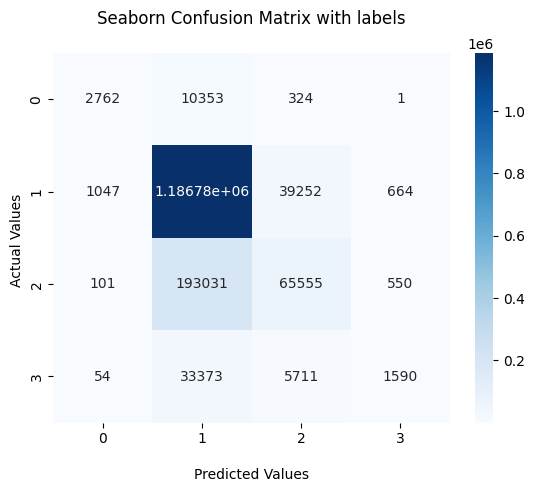

In [200]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')

ax.set_title('Seaborn Confusion Matrix with labels\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

plt.show()

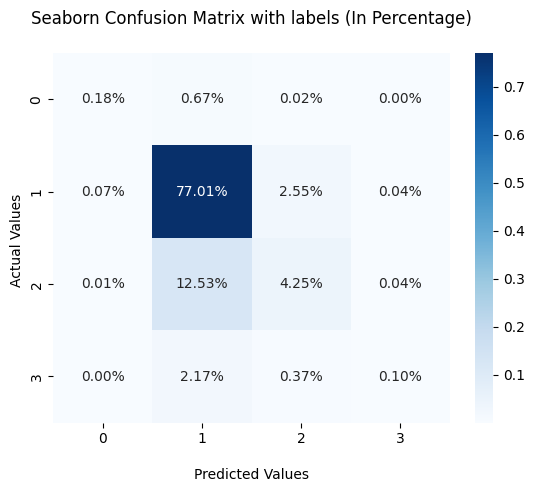

In [201]:
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels (In Percentage)\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

plt.show()

In [ ]:
print("Classification Report: \n", classification_report(y_test, y_pred))